# Homework 1

## FINM 35700 - Spring 2023

### UChicago Financial Mathematics

* Alex Popovici
* alex.popovici@uchicago.edu

This homework relies on:

- the US government bonds symbology file `govt_symbology`, 
- the "on-the-run" treasuries data file `govt_on_the_run`,
- the corporate  bonds symbology file `corp_symbology` and
- the market data file `market_prices_eod`.


You can find more details on US treasury instruments in the FINM 37400 Fixed Income course.



# Problem 1: Explore symbology for US treasuries and corporate bonds

## a. Load and explore US government bonds symbology data

Load the `govt_symbology` Excel file into a dataframe. For each government bond issue, calculate its initial term/time-to-maturity in years (based on issue date and maturity date), as well as the current time-to-maturity. Assume a year has 365.25 days, or use QuantLib yearFraction() function.

In [1]:
import pandas as pd
import numpy as np
import QuantLib as ql
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
govt_symbology = pd.read_excel("/Users/zhenyuwang/Library/Mobile Documents/com~apple~CloudDocs/U Chicago/35700/CreditMarkets_Homework_1/data/govt_symbology.xlsx")
govt_symbology['term'] = (govt_symbology['maturity'] - govt_symbology['start_date']).dt.days/365.25
govt_symbology['current_date'] = datetime(2023,4,14)
govt_symbology['TTM'] = (govt_symbology['maturity'] - govt_symbology['current_date']).dt.days/365.25
govt_symbology

,ticker,class,figi,isin,trace,security,name,type,coupon,cpn_type,dcc,cpn_freq,days_settle,start_date,cpn_first,acc_first,maturity,country,currency,term,current_date,TTM
0,B,Govt,BBG01FSQGRT9,US912796CQ02,TSRYS5551439,B 09/14/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2023-03-16,NaT,NaT,2023-09-14,US,USD,0.498289,2023-04-14,0.418891
1,B,Govt,BBG01FY3YC89,US912796CR84,TSRYS5554749,B 09/21/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2023-03-23,NaT,NaT,2023-09-21,US,USD,0.498289,2023-04-14,0.438056
2,B,Govt,BBG01G14BS72,US912796CS67,TSRYS5557561,B 09/28/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2023-03-30,NaT,NaT,2023-09-28,US,USD,0.498289,2023-04-14,0.457221
3,B,Govt,BBG01BYWNTS7,US912796CU14,TSRYS5513508,B 04/18/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2022-12-20,NaT,NaT,2023-04-18,US,USD,0.325804,2023-04-14,0.010951
4,B,Govt,BBG01C3GB4X6,US912796CV96,TSRYS5516304,B 04/25/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2022-12-27,NaT,NaT,2023-04-25,US,USD,0.325804,2023-04-14,0.030116
5,B,Govt,BBG01C50MS28,US912796CW79,TSRYS5519934,B 05/02/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2023-01-03,NaT,NaT,2023-05-02,US,USD,0.325804,2023-04-14,0.049281
6,B,Govt,BBG016V8W757,US912796V482,TSRYS5395407,B 04/20/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2022-04-21,NaT,NaT,2023-04-20,US,USD,0.996578,2023-04-14,0.016427
7,B,Govt,BBG017F7D131,US912796W472,TSRYS5411513,B 05/18/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2022-05-19,NaT,NaT,2023-05-18,US,USD,0.996578,2023-04-14,0.093087
8,B,Govt,BBG0182B60W2,US912796X538,TSRYS5425061,B 06/15/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2022-06-16,NaT,NaT,2023-06-15,US,USD,0.996578,2023-04-14,0.169747
9,B,Govt,BBG018PJZY27,US912796XQ72,TSRYS5440725,B 07/13/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2022-07-14,NaT,NaT,2023-07-13,US,USD,0.996578,2023-04-14,0.246407


## b. Historical time series of US treasury coupons 

Plot the time series of coupons for for US treasury notes/bonds issued in the last 10 years (indexed by issue date). 
What can you say about the overall level of the coupons in the last 2 years?


In [ ]:
past_10yrs = govt_symbology[(govt_symbology['start_date'] >= datetime(2023,4,14) - timedelta(days = 3652.5)) & (govt_symbology['term'] >= 1)]
past_10yrs

<Axes: xlabel='start_date'>

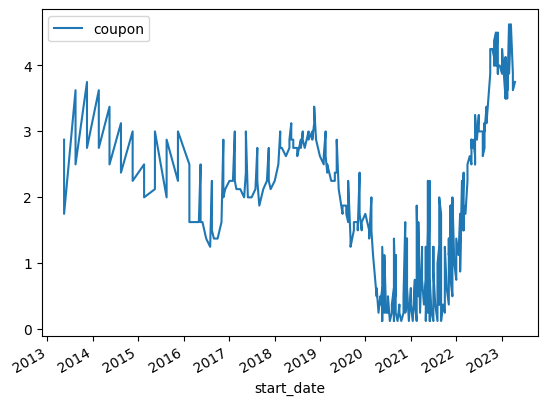

In [4]:
past_10yrs.plot(x = 'start_date',  y = 'coupon')

The coupons have gone up significantly in the past 2 years.

## c. Load the on-the-run US treasuries

Load the `govt_on_the_run` Excel file into a dataframe. Select the current on-the-run 2Y, 3Y, 5Y, 7Y, 10Y, 20Y and 30Y issues (off-the-run issues have the B & C suffix). Create a separate symbology dataframe for on-the-run treasuries only, to be used later on for the on-the-run government yield curve bootstrapping.

In [5]:
govt_on_the_run = pd.read_excel("/Users/zhenyuwang/Library/Mobile Documents/com~apple~CloudDocs/U Chicago/35700/CreditMarkets_Homework_1/data/govt_on_the_run.xlsx")
govt_on_the_run_only = govt_on_the_run[~govt_on_the_run['ticker'].str.contains('B|C')]
govt_on_the_run_only_symbology = govt_symbology[govt_symbology['isin'].isin(govt_on_the_run_only['isin'])]
govt_on_the_run_only_symbology

,ticker,class,figi,isin,trace,security,name,type,coupon,cpn_type,dcc,cpn_freq,days_settle,start_date,cpn_first,acc_first,maturity,country,currency,term,current_date,TTM
138,T,Govt,BBG01DVKBH56,US912810TN81,TSRYS5533944,T 3 5/8 02/15/53,US TREASURY N/B,US GOVERNMENT,3.625,FIXED,ACT/ACT,2.0,1,2023-02-15,2023-08-15,2023-02-15,2053-02-15,US,USD,30.001369,2023-04-14,29.842574
139,T,Govt,BBG01F6N6GN1,US912810TQ13,TSRYS5536898,T 3 7/8 02/15/43,US TREASURY N/B,US GOVERNMENT,3.875,FIXED,ACT/ACT,2.0,1,2023-02-28,2023-08-15,2023-02-15,2043-02-15,US,USD,19.964408,2023-04-14,19.841205
373,T,Govt,BBG01DVKBC66,US91282CGM73,TSRYS5533941,T 3 1/2 02/15/33,US TREASURY N/B,US GOVERNMENT,3.500,FIXED,ACT/ACT,2.0,1,2023-02-15,2023-08-15,2023-02-15,2033-02-15,US,USD,10.001369,2023-04-14,9.842574
378,T,Govt,BBG01G14BV75,US91282CGS44,TSRYS5557563,T 3 5/8 03/31/30,US TREASURY N/B,US GOVERNMENT,3.625,FIXED,ACT/ACT,2.0,1,2023-03-31,2023-09-30,2023-03-31,2030-03-31,US,USD,7.000684,2023-04-14,6.962355
379,T,Govt,BBG01G14BW91,US91282CGT27,TSRYS5557562,T 3 5/8 03/31/28,US TREASURY N/B,US GOVERNMENT,3.625,FIXED,ACT/ACT,2.0,1,2023-03-31,2023-09-30,2023-03-31,2028-03-31,US,USD,5.002053,2023-04-14,4.963723
380,T,Govt,BBG01G14BXX2,US91282CGU99,TSRYS5557560,T 3 7/8 03/31/25,US TREASURY N/B,US GOVERNMENT,3.875,FIXED,ACT/ACT,2.0,1,2023-03-31,2023-09-30,2023-03-31,2025-03-31,US,USD,2.001369,2023-04-14,1.963039
381,T,Govt,BBG01G5ZMM43,US91282CGV72,TSRYS5565937,T 3 3/4 04/15/26,US TREASURY N/B,US GOVERNMENT,3.750,FIXED,ACT/ACT,2.0,1,2023-04-17,2023-10-15,2023-04-15,2026-04-15,US,USD,2.995209,2023-04-14,3.003422


## d. Load and explore US corporate bonds symbology data

Load the `corp_symbology` Excel file into a dataframe. 

Create a new (filtered) dataframe for 
* bullet/non-callable (mty_typ="AT MATURITY"), 
* senior unsecured (rank = "Sr Unsecured"),
* fixed coupon (cpn_type="FIXED")

bonds only, with following columns:



| ticker | figi | security | name | coupon | start_date | maturity | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

where 
* `term` refers to the initial term/time-to-maturity in years
* `TTM` refers to the current time-to-maturity in years

Create a separate dataframe for VZ issuer only.

In [6]:
corp_symbology = pd.read_excel("/Users/zhenyuwang/Library/Mobile Documents/com~apple~CloudDocs/U Chicago/35700/CreditMarkets_Homework_1/data/corp_symbology.xlsx")
corp_symbology['term'] = (corp_symbology['maturity'] - corp_symbology['start_date']).dt.days/365.25
corp_symbology['current_date'] = datetime(2023,4,14)
corp_symbology['TTM'] = (corp_symbology['maturity'] - corp_symbology['current_date']).dt.days/365.25
bullet_fixed_sr_unsecured = corp_symbology.loc[(corp_symbology['mty_typ'] == "AT MATURITY") & (corp_symbology['rank'] == 'Sr Unsecured') & (corp_symbology['cpn_type'] == 'FIXED'),['ticker','isin','figi','und_bench_isin','security','name','coupon','start_date','maturity','term','TTM'] ]
bullet_fixed_sr_unsecured

,ticker,isin,figi,und_bench_isin,security,name,coupon,start_date,maturity,term,TTM
3,DIS,US254687DV52,BBG00QNKP8R8,US91282CGM73,DIS 6.55 03/15/33,WALT DISNEY COMPANY/THE,6.550,2019-11-22,2033-03-15,13.311431,9.919233
4,DIS,US254687DZ66,BBG00QNKR4J4,US91282CGM73,DIS 6.2 12/15/34,WALT DISNEY COMPANY/THE,6.200,2019-11-22,2034-12-15,15.063655,11.671458
5,DIS,US254687EB89,BBG00QNKRV04,US91282CGM73,DIS 6.4 12/15/35,WALT DISNEY COMPANY/THE,6.400,2019-11-22,2035-12-15,16.062971,12.670773
6,DIS,US254687EF93,BBG00QNKSCY8,US91282CGM73,DIS 6.15 03/01/37,WALT DISNEY COMPANY/THE,6.150,2019-11-22,2037-03-01,17.273101,13.880903
7,DIS,US254687EH59,BBG00QNKSBB5,US91282CGM73,DIS 6.65 11/15/37,WALT DISNEY COMPANY/THE,6.650,2019-11-22,2037-11-15,17.982204,14.590007
8,DIS,US254687ER32,BBG00QNKVGW7,US912810TQ13,DIS 6.15 02/15/41,WALT DISNEY COMPANY/THE,6.150,2019-11-22,2041-02-15,21.234771,17.842574
10,DIS,US254687EZ57,BBG00QNKKP86,US912810TQ13,DIS 7 3/4 12/01/45,WALT DISNEY COMPANY/THE,7.750,2019-11-22,2045-12-01,26.026010,22.633812
15,DIS,US254687FN19,BBG00SMMG203,US91282CGU99,DIS 3.35 03/24/25,WALT DISNEY COMPANY/THE,3.350,2020-03-23,2025-03-24,5.002053,1.943874
16,DIS,US254687FP66,BBG00SMMG3C8,US91282CGT27,DIS 3.7 03/23/27,WALT DISNEY COMPANY/THE,3.700,2020-03-23,2027-03-23,6.997947,3.939767
17,DIS,US254687FQ40,BBG00SMMG3D7,US91282CGM73,DIS 3.8 03/22/30,WALT DISNEY COMPANY/THE,3.800,2020-03-23,2030-03-22,9.995893,6.937714


In [7]:
vz = bullet_fixed_sr_unsecured[bullet_fixed_sr_unsecured['ticker'] == "VZ"]
vz

,ticker,isin,figi,und_bench_isin,security,name,coupon,start_date,maturity,term,TTM
181,VZ,US92343VAF13,BBG00000BHR9,US91282CGM73,VZ 6 1/4 04/01/37,VERIZON COMMUNICATIONS,6.250,2007-04-03,2037-04-01,29.995893,13.965777
182,VZ,US92343VAK08,BBG0000M1DD6,US91282CGM73,VZ 6.4 02/15/38,VERIZON COMMUNICATIONS,6.400,2008-02-12,2038-02-15,30.009582,14.841889
183,VZ,US92343VBE39,BBG0027BCJ08,US912810TQ13,VZ 4 3/4 11/01/41,VERIZON COMMUNICATIONS,4.750,2011-11-03,2041-11-01,29.995893,18.551677
185,VZ,US92343VBS25,BBG00580D503,US91282CGM73,VZ 6.4 09/15/33,VERIZON COMMUNICATIONS,6.400,2013-09-18,2033-09-15,19.991786,10.422998
186,VZ,US92343VBT08,BBG00580DD79,US912810TQ13,VZ 6.55 09/15/43,VERIZON COMMUNICATIONS,6.550,2013-09-18,2043-09-15,29.990418,20.421629
187,VZ,US92343VCK89,BBG0083CP3G1,US912810TQ13,VZ 4.862 08/21/46,VERIZON COMMUNICATIONS,4.862,2015-03-11,2046-08-21,31.446954,23.353867
188,VZ,US92343VCM46,BBG0083CP816,US912810TL26,VZ 5.012 08/21/54,VERIZON COMMUNICATIONS,5.012,2015-03-11,2054-08-21,39.446954,31.353867
191,VZ,US92343VCV45,BBG009PNV1G8,US91282CGM73,VZ 4.272 01/15/36,VERIZON COMMUNICATIONS,4.272,2015-08-20,2036-01-15,20.405202,12.755647
192,VZ,US92343VCX01,BBG009PNW3Z2,US912810TL26,VZ 4.522 09/15/48,VERIZON COMMUNICATIONS,4.522,2015-08-20,2048-09-15,33.073238,25.423682
193,VZ,US92343VCZ58,BBG009PNW578,US912810TL26,VZ 4.672 03/15/55,VERIZON COMMUNICATIONS,4.672,2015-08-20,2055-03-15,39.567420,31.917864


# Problem 2: Explore EOD market prices and yields

## a. Load and explore treasury market prices and yields

Load the `market_prices_eod` Excel file into a dataframe. It provides market data for US treasuries and corporate bonds of 2023-04-14.

Join the treasuries symbology dataframe with the market data, to add the following columns:


| date | bid | ask | mid | bid_yield | ask_yield | mid_yield | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

Plot a graph/scatter plot of treasury mid yields by TTM.


,ticker,class,figi,isin,trace,security,name,type,coupon,cpn_type,dcc,cpn_freq,days_settle,start_date,cpn_first,acc_first,maturity,country,currency,term,current_date,TTM,date,bid,ask,mid_clean,bid_yield,ask_yield,mid_yield
238,T,Govt,BBG00SZVJ2T5,US912828ZH65,TSRYS4972341,T 0 1/4 04/15/23,US TREASURY N/B,US GOVERNMENT,0.250,FIXED,ACT/ACT,2.0,1,2020-04-15,2020-10-15,2020-04-15,2023-04-15,US,USD,2.997947,2023-04-14,0.002738,2023-04-14,99.9453,100.0273,99.9863,20.142,-9.688,5.2270
3,B,Govt,BBG01BYWNTS7,US912796CU14,TSRYS5513508,B 04/18/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2022-12-20,NaT,NaT,2023-04-18,US,USD,0.325804,2023-04-14,0.010951,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,B,Govt,BBG016V8W757,US912796V482,TSRYS5395407,B 04/20/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2022-04-21,NaT,NaT,2023-04-20,US,USD,0.996578,2023-04-14,0.016427,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,B,Govt,BBG01C3GB4X6,US912796CV96,TSRYS5516304,B 04/25/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2022-12-27,NaT,NaT,2023-04-25,US,USD,0.325804,2023-04-14,0.030116,NaT,NaN,NaN,NaN,NaN,NaN,NaN
16,B,Govt,BBG01B52H3M5,US912796YV58,TSRYS5490688,B 04/27/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2022-10-27,NaT,NaT,2023-04-27,US,USD,0.498289,2023-04-14,0.035592,NaT,NaN,NaN,NaN,NaN,NaN,NaN
191,T,Govt,BBG00CS9FRD3,US912828R283,TSRYS4494307,T 1 5/8 04/30/23,US TREASURY N/B,US GOVERNMENT,1.625,FIXED,ACT/ACT,2.0,1,2016-05-02,2016-10-31,2016-04-30,2023-04-30,US,USD,6.992471,2023-04-14,0.043806,2023-04-14,99.8633,99.9414,99.9023,5.399,3.234,4.3165
154,T,Govt,BBG00KP3MM62,US9128284L18,TSRYS4622555,T 2 3/4 04/30/23,US TREASURY N/B,US GOVERNMENT,2.750,FIXED,ACT/ACT,2.0,1,2018-04-30,2018-10-31,2018-04-30,2023-04-30,US,USD,4.999316,2023-04-14,0.043806,2023-04-14,99.9023,99.9805,99.9414,5.406,3.253,4.3295
280,T,Govt,BBG0109YZ0Z7,US91282CBX83,TSRYS5168788,T 0 1/8 04/30/23,US TREASURY N/B,US GOVERNMENT,0.125,FIXED,ACT/ACT,2.0,1,2021-04-30,2021-10-31,2021-04-30,2023-04-30,US,USD,1.998631,2023-04-14,0.043806,2023-04-14,99.8047,99.8633,99.8340,5.571,3.935,4.7530
5,B,Govt,BBG01C50MS28,US912796CW79,TSRYS5519934,B 05/02/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2023-01-03,NaT,NaT,2023-05-02,US,USD,0.325804,2023-04-14,0.049281,NaT,NaN,NaN,NaN,NaN,NaN,NaN
17,B,Govt,BBG01B88T621,US912796YW32,TSRYS5493523,B 05/04/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,ACT/360,NaN,1,2022-11-03,NaT,NaT,2023-05-04,US,USD,0.498289,2023-04-14,0.054757,NaT,NaN,NaN,NaN,NaN,NaN,NaN


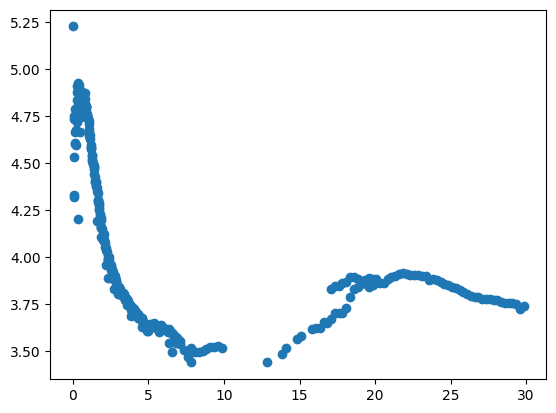

In [ ]:
market_prices = pd.read_excel("/Users/zhenyuwang/Library/Mobile Documents/com~apple~CloudDocs/U Chicago/35700/CreditMarkets_Homework_1/data/market_prices_eod.xlsx")
market_prices['mid_yield'] =( market_prices['bid_yield'] + market_prices['ask_yield'])/2
govt_yield = govt_symbology.merge(market_prices[['figi','date','bid','ask','mid_clean',"bid_yield" , "ask_yield",'mid_yield']], how = 'left',on = 'figi')
govt_yield = govt_yield.sort_values(['TTM'])
#display(govt_yield)

plt.scatter(govt_yield['TTM'], govt_yield['mid_yield'])

## b. Explore on-the-run treasuries only
Create a separate joint dataframe for on-the-run treasuries only.

Plot a graph/scatter plot of on-the-run treasury mid yields by TTM.

,ticker,class,figi,isin,trace,security,name,type,coupon,cpn_type,dcc,cpn_freq,days_settle,start_date,cpn_first,acc_first,maturity,country,currency,term,current_date,TTM,date,bid,ask,mid_clean,bid_yield,ask_yield,mid_yield
380,T,Govt,BBG01G14BXX2,US91282CGU99,TSRYS5557560,T 3 7/8 03/31/25,US TREASURY N/B,US GOVERNMENT,3.875,FIXED,ACT/ACT,2.0,1,2023-03-31,2023-09-30,2023-03-31,2025-03-31,US,USD,2.001369,2023-04-14,1.963039,2023-04-14,99.5703,99.5820,99.5762,4.105,4.099,4.1020
381,T,Govt,BBG01G5ZMM43,US91282CGV72,TSRYS5565937,T 3 3/4 04/15/26,US TREASURY N/B,US GOVERNMENT,3.750,FIXED,ACT/ACT,2.0,1,2023-04-17,2023-10-15,2023-04-15,2026-04-15,US,USD,2.995209,2023-04-14,3.003422,2023-04-14,99.7578,99.7734,99.7656,3.836,3.831,3.8335
379,T,Govt,BBG01G14BW91,US91282CGT27,TSRYS5557562,T 3 5/8 03/31/28,US TREASURY N/B,US GOVERNMENT,3.625,FIXED,ACT/ACT,2.0,1,2023-03-31,2023-09-30,2023-03-31,2028-03-31,US,USD,5.002053,2023-04-14,4.963723,2023-04-14,100.0703,100.0859,100.0781,3.609,3.606,3.6075
378,T,Govt,BBG01G14BV75,US91282CGS44,TSRYS5557563,T 3 5/8 03/31/30,US TREASURY N/B,US GOVERNMENT,3.625,FIXED,ACT/ACT,2.0,1,2023-03-31,2023-09-30,2023-03-31,2030-03-31,US,USD,7.000684,2023-04-14,6.962355,2023-04-14,100.3750,100.4375,100.4063,3.563,3.553,3.5580
373,T,Govt,BBG01DVKBC66,US91282CGM73,TSRYS5533941,T 3 1/2 02/15/33,US TREASURY N/B,US GOVERNMENT,3.500,FIXED,ACT/ACT,2.0,1,2023-02-15,2023-08-15,2023-02-15,2033-02-15,US,USD,10.001369,2023-04-14,9.842574,2023-04-14,99.8438,99.8906,99.8672,3.519,3.513,3.5160
139,T,Govt,BBG01F6N6GN1,US912810TQ13,TSRYS5536898,T 3 7/8 02/15/43,US TREASURY N/B,US GOVERNMENT,3.875,FIXED,ACT/ACT,2.0,1,2023-02-28,2023-08-15,2023-02-15,2043-02-15,US,USD,19.964408,2023-04-14,19.841205,2023-04-14,100.2969,100.3750,100.3359,3.853,3.847,3.8500
138,T,Govt,BBG01DVKBH56,US912810TN81,TSRYS5533944,T 3 5/8 02/15/53,US TREASURY N/B,US GOVERNMENT,3.625,FIXED,ACT/ACT,2.0,1,2023-02-15,2023-08-15,2023-02-15,2053-02-15,US,USD,30.001369,2023-04-14,29.842574,2023-04-14,97.9531,98.0313,97.9922,3.739,3.735,3.7370


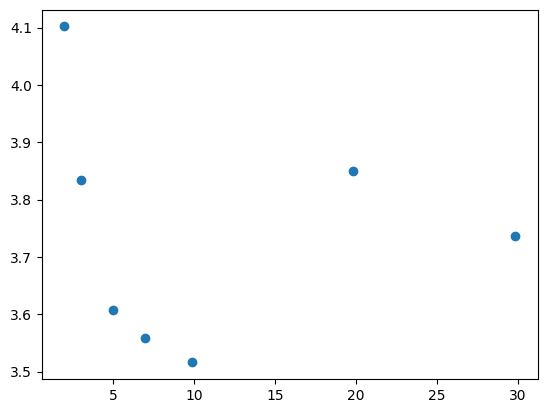

In [9]:
govt_on_the_run_yield = govt_yield[govt_yield['figi'].isin(govt_on_the_run_only['figi'])]
plt.scatter(govt_on_the_run_yield['TTM'], govt_on_the_run_yield['mid_yield'])

govt_on_the_run_yield

## c. Load and explore corporate bond market prices and yields

Join the filtered corporate bonds symbology dataframe with the market data, to add the following columns:


| date | bid | ask | mid | bid_yield | ask_yield | mid_yield | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

List the unique tickers/issuers available in the dataframe.

In [10]:
bullet_fixed_sr_unsecured_yield = bullet_fixed_sr_unsecured.merge(market_prices[['figi','date','bid','ask','mid_clean',"bid_yield" , "ask_yield",'mid_yield']], how = 'left',on = 'figi')
bullet_fixed_sr_unsecured_yield = bullet_fixed_sr_unsecured_yield.sort_values(['ticker','TTM'])
bullet_fixed_sr_unsecured_yield

,ticker,isin,figi,und_bench_isin,security,name,coupon,start_date,maturity,term,TTM,date,bid,ask,mid_clean,bid_yield,ask_yield,mid_yield
23,DIS,USU25497AE53,BBG00N355M91,US912796YJ21,DIS 8 7/8 04/26/23,WALT DISNEY COMPANY/THE,8.875,2019-03-20,2023-04-26,4.101300,0.032854,2023-04-14,100.087,100.179,100.133,4.760,0.793,2.7765
24,DIS,USU25497AG02,BBG00N36B7D0,US91282CGU99,DIS 7 3/4 01/20/24,WALT DISNEY COMPANY/THE,7.750,2019-03-20,2024-01-20,4.837782,0.769336,2023-04-14,101.739,102.165,101.952,5.354,4.782,5.0680
25,DIS,USU25497AL96,BBG00N3BBT23,US91282CGU99,DIS 8 1/2 02/23/25,WALT DISNEY COMPANY/THE,8.500,2019-03-20,2025-02-23,5.932923,1.864476,2023-04-14,106.553,106.893,106.723,4.747,4.561,4.6540
7,DIS,US254687FN19,BBG00SMMG203,US91282CGU99,DIS 3.35 03/24/25,WALT DISNEY COMPANY/THE,3.350,2020-03-23,2025-03-24,5.002053,1.943874,2023-04-14,98.261,98.495,98.378,4.296,4.167,4.2315
18,DIS,US25468PDF09,BBG00B088H47,US91282CGU99,DIS 3.15 09/17/25,TWDC ENTERPRISES 18 CORP,3.150,2015-09-17,2025-09-17,10.001369,2.428474,2023-04-14,96.918,97.406,97.162,4.511,4.292,4.4015
10,DIS,US254687FV35,BBG00TSCC372,US91282CGR60,DIS 1 3/4 01/13/26,WALT DISNEY COMPANY/THE,1.750,2020-05-13,2026-01-13,5.670089,2.751540,2023-04-14,93.676,93.924,93.800,4.221,4.120,4.1705
19,DIS,US25468PDK93,BBG00BTF34H0,US91282CGR60,DIS 3 02/13/26,TWDC ENTERPRISES 18 CORP,3.000,2016-01-08,2026-02-13,10.099932,2.836413,2023-04-14,96.498,96.918,96.708,4.331,4.169,4.2500
20,DIS,US25468PDM59,BBG00D9MV7W8,US91282CGR60,DIS 1.85 07/30/26,TWDC ENTERPRISES 18 CORP,1.850,2016-07-12,2026-07-30,10.047912,3.293634,2023-04-14,92.874,93.244,93.059,4.195,4.068,4.1315
8,DIS,US254687FP66,BBG00SMMG3C8,US91282CGT27,DIS 3.7 03/23/27,WALT DISNEY COMPANY/THE,3.700,2020-03-23,2027-03-23,6.997947,3.939767,2023-04-14,97.945,98.284,98.114,4.273,4.177,4.2250
22,DIS,US25468PDV58,BBG00GVLQ184,US91282CGT27,DIS 2.95 06/15/27,TWDC ENTERPRISES 18 CORP,2.950,2017-06-06,2027-06-15,10.023272,4.169747,2023-04-14,94.998,95.448,95.223,4.275,4.152,4.2135


In [11]:
bullet_fixed_sr_unsecured_yield['ticker'].unique()

array(['DIS', 'IBM', 'MS', 'ORCL', 'VZ'], dtype=object)

## d. Yield curve plots

Plot a graph/scatter plot of mid yield curves by TTM (one line per ticker/issuer).

Add a separate line for on-the-run US treasury yield curve (risk free curve).

What can you say about the credit issuer yields, compared to US treasury yields?

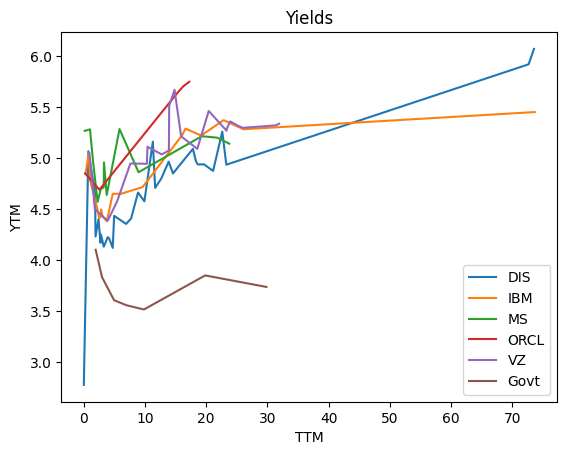

In [12]:
grouped1 = bullet_fixed_sr_unsecured_yield.groupby('ticker')

# group the second dataframe by 'group'


# create a figure and axis object
fig, ax = plt.subplots()


for name, group in grouped1:
    ax.plot(group['TTM'], group['mid_yield'], label=name)

ax.plot(govt_on_the_run_yield['TTM'],govt_on_the_run_yield['mid_yield'], label = "Govt")
# add a legend
ax.legend()


ax.set_xlabel('TTM')
ax.set_ylabel('YTM')
ax.set_title('Yields')
plt.show()

The corporate yields are clearly higher than government yields, reflecting the credit spread.

# Problem 3: Underying treasury benchmarks and credit spreads

## a. Add underlying benchmark bond mid yields

Use the column 'und_bench_yield' to identify the underlying benchmark bond for each issue.

Add two new columns to the joint corporate bond dataframe:

| und_bench_yield | credit_spread |
|----------|-------|

where 

*  `und_bench_yield` = underlying benchmark bond mid yield and
*  `credit_spread` = issue yield - underlying benchmark bond mid yield.

In [13]:
bullet_fixed_sr_unsecured_yield_und = bullet_fixed_sr_unsecured_yield.merge(market_prices[['isin','mid_yield']], how = 'left',left_on = 'und_bench_isin', right_on='isin')
bullet_fixed_sr_unsecured_yield_und = bullet_fixed_sr_unsecured_yield_und.rename(columns = {"mid_yield_x": "mid_yield",'mid_yield_y':'und_bench_yield'})
bullet_fixed_sr_unsecured_yield_und = bullet_fixed_sr_unsecured_yield_und.dropna(subset=['und_bench_yield'])
bullet_fixed_sr_unsecured_yield_und['credit_spread'] = bullet_fixed_sr_unsecured_yield_und['mid_yield'] - bullet_fixed_sr_unsecured_yield_und['und_bench_yield']
bullet_fixed_sr_unsecured_yield_und

,ticker,isin_x,figi,und_bench_isin,security,name,coupon,start_date,maturity,term,TTM,date,bid,ask,mid_clean,bid_yield,ask_yield,mid_yield,isin_y,und_bench_yield,credit_spread
1,DIS,USU25497AG02,BBG00N36B7D0,US91282CGU99,DIS 7 3/4 01/20/24,WALT DISNEY COMPANY/THE,7.750,2019-03-20,2024-01-20,4.837782,0.769336,2023-04-14,101.739,102.165,101.952,5.354,4.782,5.0680,US91282CGU99,4.1020,0.9660
2,DIS,USU25497AL96,BBG00N3BBT23,US91282CGU99,DIS 8 1/2 02/23/25,WALT DISNEY COMPANY/THE,8.500,2019-03-20,2025-02-23,5.932923,1.864476,2023-04-14,106.553,106.893,106.723,4.747,4.561,4.6540,US91282CGU99,4.1020,0.5520
3,DIS,US254687FN19,BBG00SMMG203,US91282CGU99,DIS 3.35 03/24/25,WALT DISNEY COMPANY/THE,3.350,2020-03-23,2025-03-24,5.002053,1.943874,2023-04-14,98.261,98.495,98.378,4.296,4.167,4.2315,US91282CGU99,4.1020,0.1295
4,DIS,US25468PDF09,BBG00B088H47,US91282CGU99,DIS 3.15 09/17/25,TWDC ENTERPRISES 18 CORP,3.150,2015-09-17,2025-09-17,10.001369,2.428474,2023-04-14,96.918,97.406,97.162,4.511,4.292,4.4015,US91282CGU99,4.1020,0.2995
5,DIS,US254687FV35,BBG00TSCC372,US91282CGR60,DIS 1 3/4 01/13/26,WALT DISNEY COMPANY/THE,1.750,2020-05-13,2026-01-13,5.670089,2.751540,2023-04-14,93.676,93.924,93.800,4.221,4.120,4.1705,US91282CGR60,3.8395,0.3310
6,DIS,US25468PDK93,BBG00BTF34H0,US91282CGR60,DIS 3 02/13/26,TWDC ENTERPRISES 18 CORP,3.000,2016-01-08,2026-02-13,10.099932,2.836413,2023-04-14,96.498,96.918,96.708,4.331,4.169,4.2500,US91282CGR60,3.8395,0.4105
7,DIS,US25468PDM59,BBG00D9MV7W8,US91282CGR60,DIS 1.85 07/30/26,TWDC ENTERPRISES 18 CORP,1.850,2016-07-12,2026-07-30,10.047912,3.293634,2023-04-14,92.874,93.244,93.059,4.195,4.068,4.1315,US91282CGR60,3.8395,0.2920
8,DIS,US254687FP66,BBG00SMMG3C8,US91282CGT27,DIS 3.7 03/23/27,WALT DISNEY COMPANY/THE,3.700,2020-03-23,2027-03-23,6.997947,3.939767,2023-04-14,97.945,98.284,98.114,4.273,4.177,4.2250,US91282CGT27,3.6075,0.6175
9,DIS,US25468PDV58,BBG00GVLQ184,US91282CGT27,DIS 2.95 06/15/27,TWDC ENTERPRISES 18 CORP,2.950,2017-06-06,2027-06-15,10.023272,4.169747,2023-04-14,94.998,95.448,95.223,4.275,4.152,4.2135,US91282CGT27,3.6075,0.6060
10,DIS,US254687FW18,BBG00TSCC3H1,US91282CGT27,DIS 2.2 01/13/28,WALT DISNEY COMPANY/THE,2.200,2020-05-13,2028-01-13,7.668720,4.750171,2023-04-14,91.629,91.999,91.814,4.165,4.074,4.1195,US91282CGT27,3.6075,0.5120


## b. Credit spread curve plots

Plot a graph/scatter plot of credit spread curves by TTM (one line per issuer).


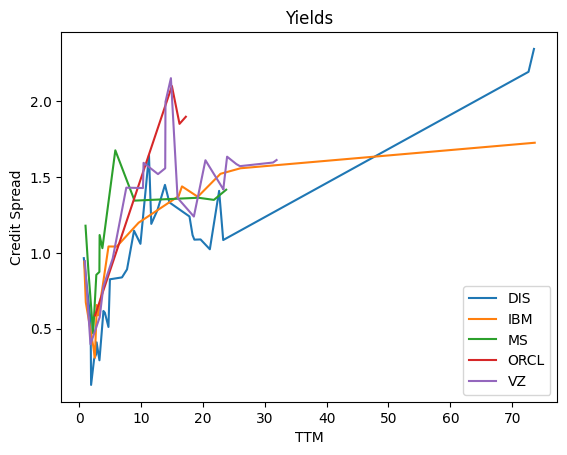

In [14]:
grouped1 = bullet_fixed_sr_unsecured_yield_und.groupby('ticker')

fig, ax = plt.subplots()


for name, group in grouped1:
    ax.plot(group['TTM'], group['credit_spread'], label=name)

ax.legend()


ax.set_xlabel('TTM')
ax.set_ylabel('Credit Spread')
ax.set_title('Yields')
plt.show()

## c. Add g-spreads

Add two new columns to the joint corporate bond dataframe:

| interp_tsy_yield | g_spread |
|----------|-------|

where 

*  `interp_tsy_yield` = interpolated treasury yield (using on-the-run treasuries only), matching the issue maturity
*  `g_spread` = issue yield - interp_tsy_yield.

,ticker,isin_x,figi,und_bench_isin,security,name,coupon,start_date,maturity,term,TTM,date,bid,ask,mid_clean,bid_yield,ask_yield,mid_yield,isin_y,und_bench_yield,credit_spread,interp_tsy_yield,g_spread
0,DIS,USU25497AG02,BBG00N36B7D0,US91282CGU99,DIS 7 3/4 01/20/24,WALT DISNEY COMPANY/THE,7.750,2019-03-20,2024-01-20,4.837782,0.769336,2023-04-14,101.739,102.165,101.952,5.354,4.782,5.0680,US91282CGU99,4.1020,0.9660,NaN,NaN
1,IBM,US459200HU86,BBG005ZC4J89,US91282CGU99,IBM 3 5/8 02/12/24,IBM CORP,3.625,2014-02-12,2024-02-12,9.998631,0.832307,2023-04-14,98.747,98.999,98.873,5.205,4.884,5.0445,US91282CGU99,4.1020,0.9425,NaN,NaN
2,VZ,US92343VGF58,BBG00ZLKTDJ4,US91282CGU99,VZ 0 3/4 03/22/24,VERIZON COMMUNICATIONS,0.750,2021-03-22,2024-03-22,3.000684,0.939083,2023-04-14,95.975,96.327,96.151,5.251,4.846,5.0485,US91282CGU99,4.1020,0.9465,NaN,NaN
3,MS,US61746BDQ68,BBG006DDT5Z2,US91282CGU99,MS 3 7/8 04/29/24,MORGAN STANLEY,3.875,2014-04-28,2024-04-29,10.004107,1.043121,2023-04-14,98.470,98.741,98.606,5.420,5.144,5.2820,US91282CGU99,4.1020,1.1800,NaN,NaN
4,IBM,US459200JY80,BBG00P3BLGV3,US91282CGU99,IBM 3 05/15/24,IBM CORP,3.000,2019-05-15,2024-05-15,5.002053,1.086927,2023-04-14,98.057,98.258,98.158,4.875,4.678,4.7765,US91282CGU99,4.1020,0.6745,NaN,NaN
5,MS,US61761JVL06,BBG007D3V8N6,US91282CGU99,MS 3.7 10/23/24,MORGAN STANLEY,3.700,2014-10-23,2024-10-23,10.001369,1.527721,2023-04-14,98.029,98.298,98.164,5.069,4.880,4.9745,US91282CGU99,4.1020,0.8725,NaN,NaN
6,VZ,US92343VEN01,BBG00JKZK9K4,US91282CGU99,VZ 3.376 02/15/25,VERIZON COMMUNICATIONS,3.376,2018-01-19,2025-02-15,7.074606,1.842574,2023-04-14,97.932,98.164,98.048,4.567,4.432,4.4995,US91282CGU99,4.1020,0.3975,NaN,NaN
7,DIS,USU25497AL96,BBG00N3BBT23,US91282CGU99,DIS 8 1/2 02/23/25,WALT DISNEY COMPANY/THE,8.500,2019-03-20,2025-02-23,5.932923,1.864476,2023-04-14,106.553,106.893,106.723,4.747,4.561,4.6540,US91282CGU99,4.1020,0.5520,NaN,NaN
8,DIS,US254687FN19,BBG00SMMG203,US91282CGU99,DIS 3.35 03/24/25,WALT DISNEY COMPANY/THE,3.350,2020-03-23,2025-03-24,5.002053,1.943874,2023-04-14,98.261,98.495,98.378,4.296,4.167,4.2315,US91282CGU99,4.1020,0.1295,NaN,NaN
9,MS,US6174468C63,BBG009NLWFK7,US91282CGU99,MS 4 07/23/25,MORGAN STANLEY,4.000,2015-07-23,2025-07-23,10.001369,2.275154,2023-04-14,98.553,99.005,98.779,4.678,4.464,4.5710,US91282CGU99,4.1020,0.4690,4.021450,0.549550


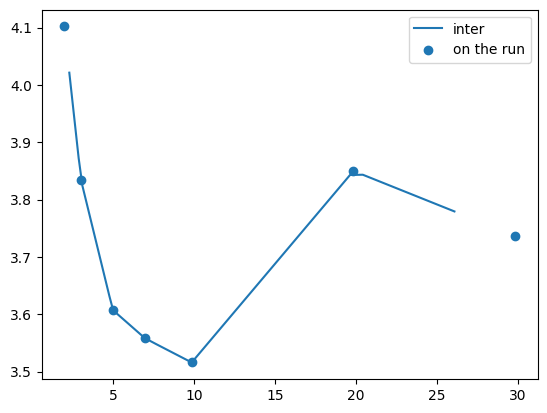

In [15]:
bullet_fixed_sr_unsecured_yield_und = bullet_fixed_sr_unsecured_yield_und.sort_values('TTM')
x_data = govt_on_the_run_yield['TTM']
y_data = govt_on_the_run_yield['mid_yield']
inter_x = list(bullet_fixed_sr_unsecured_yield_und[(bullet_fixed_sr_unsecured_yield_und['TTM'] >= 2)&(bullet_fixed_sr_unsecured_yield_und['TTM'] <= 30)]['TTM'])
inter_y = np.interp(inter_x, x_data,y_data)
df_interpolate = pd.DataFrame([inter_x,inter_y]).transpose()
df_interpolate=df_interpolate.rename(columns = {0:'TTM',1:'interpolated yield'})
plt.plot(df_interpolate['TTM'],df_interpolate['interpolated yield'],label='inter')

#inter_x = np.linspace(1,70,num = 280)
#inter_y = np.interp(inter_x, x_data,y_data)
#df_interpolate = pd.DataFrame([inter_x,inter_y]).transpose()
#df_interpolate=df_interpolate.rename(columns = {0:'x',1:'y'})
#df_interpolate = df_interpolate.sort_values('0')
#plt.plot(df_interpolate[0],df_interpolate[1],label='inter')
plt.scatter(x_data,y_data,label='on the run')
plt.legend()
bullet_fixed_sr_unsecured_yield_und_g_spread = bullet_fixed_sr_unsecured_yield_und.merge(df_interpolate,how = 'left' , on = 'TTM')
bullet_fixed_sr_unsecured_yield_und_g_spread=bullet_fixed_sr_unsecured_yield_und_g_spread.rename(columns = {'interpolated yield':"interp_tsy_yield"})
bullet_fixed_sr_unsecured_yield_und_g_spread['g_spread'] = bullet_fixed_sr_unsecured_yield_und_g_spread["mid_yield"] - bullet_fixed_sr_unsecured_yield_und_g_spread['interp_tsy_yield']
bullet_fixed_sr_unsecured_yield_und_g_spread

## d. G-spread curve plots

Plot a graph/scatter plot of g-spread curves by TTM (one line per issuer).


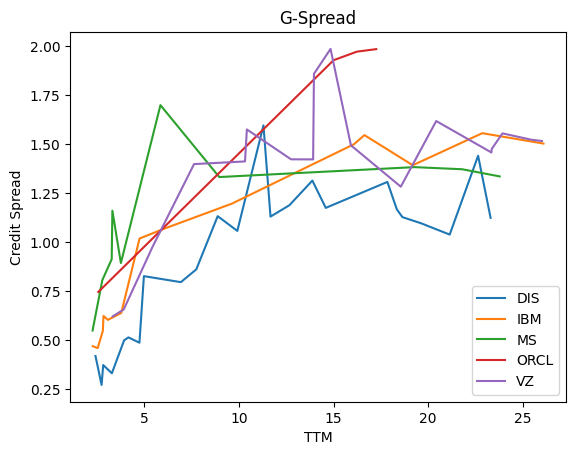

In [17]:
grouped1 = bullet_fixed_sr_unsecured_yield_und_g_spread.groupby('ticker')

fig, ax = plt.subplots()


for name, group in grouped1:
    ax.plot(group['TTM'], group['g_spread'], label=name)

ax.legend()


ax.set_xlabel('TTM')
ax.set_ylabel('Credit Spread')
ax.set_title('G-Spread')
plt.show()

# Problem 4: Explore the QuantLib introductory notebook

Try to link concepts discussed in Session 1 to various sections in the notebook. 

Address open questions by consulting the library documentation.

Going forward, we will be using QuantLib for curve calibration (US Treasury + SOFR), as well as pricing and risk of various cash and synthetic credit instruments.